## INITIALIZING THE MAZE PROBLEM

In [31]:
# MAZE PROBLEM 
# MAKE A INITIAL FROZEN LAKE PROBLEM (4x4)
#  # 1 2 3 4
#  # # # # # # 
#1 #       G #
#2 #   W     #
#3 #   W     #
#4 # S       #
   # # # # # #
# S - start
# G - end 
# W - frozen cell 
# nothing - path
# there is randomized walls,start, and end  with different paths
# GOAL = MAXIMIZE THE EXPECTED REWARD
# Number of states - 16 for each block
# Number of possible actions - 16 
num_states = 16
num_actions = 16

# LOCATION OF EVERY PART OF THE MAZE
matrix_loc = [
  ["R1C1","R1C2","R1C3","R1C4"],
  ["R2C1","R2C2","R2C3","R2C4"],
  ["R3C1","R3C2","R3C3","R3C4"],
  ["R4C1","R4C2","R4C3","R4C4"],
  ["R5C1","R5C2","R5C3","R5C4"]
]

## INITIALIZING RANDOM START,END,AND BLOCK LOCATION WITH CORRESPONDING REWARD MATRIX

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize  Reinforcement learning parameters
gamma = 0.7 # Discount factor 
alpha = 0.8 # Learning rate 
num_episodes = 10000 # Number of Episodes

# -----------Q-Learning algorithm-----------
# Initializing Q-Values and start value
# Initializing Q-Values
Q = np.zeros([num_states, num_actions])
cuml_sum = []  # array of cumulative sum per episode
# initializing the start and goal in matrix

# random start,end, blocks
random_starting_states = [] # start,end,block1,block2
end_array_index_length = 4

# put starting location in array
random_start_i = np.random.randint(0,4)  
random_start_j = np.random.randint(0,4)
random_start = random_starting_states.append(matrix_loc[random_start_i][random_start_j])
# other locations
while len(random_starting_states) < end_array_index_length:
    random_i = np.random.randint(0,4)  
    random_j = np.random.randint(0,4)
    initial_loc = matrix_loc[random_i][random_j]
    if initial_loc not in  random_starting_states: # prevent same location of other states 
        random_starting_states.append(matrix_loc[random_i][random_j])

# initializing the start,goal, and blocks in matrix
start_location = random_starting_states[0]
end_location = random_starting_states[1]
block_1 = random_starting_states[2]
block_2 = random_starting_states[3]

# Maps indices to locations
location_to_state = {
    'R1C1' : 0,
    'R1C2' : 1,
    'R1C3' : 2,
    'R1C4' : 3,
    'R2C1' : 4,
    'R2C2' : 5,
    'R2C3' : 6,
    'R2C4' : 7,
    'R3C1' : 8,
    'R3C2' : 9,
    'R3C3' : 10,
    'R3C4' : 11,
    'R4C1' : 12,
    'R4C2' : 13,
    'R4C3' : 14,
    'R4C4' : 15,
}
state_to_location = dict((state,location) for location,state in location_to_state.items()) # for getting route path



# REWARD MAP FOR THE MATRIX MAZE
# 1 = current and possible paths
# 0 = not availiable paths
# -1 = for all path if agent is in the block tile and all directions going in the block tile to prevent the agent to go to the block tile as much as possible
# 100 = goal (changed 1 to 100 for more accurate agent)
reward_matrix = np.array([
  [1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
  [1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
  [0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
  [0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
  [1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
  [0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
  [0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.],
  [0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0.],
  [0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.],
  [0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0.],
  [0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0.],
  [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1.],
  [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.],
  [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0.],
  [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1.],
  [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.]
])

# Copy the rewards matrix to new Matrix
rewards_new = np.copy(reward_matrix)
# Get the states
ending_state = location_to_state[end_location]
block_1_state = location_to_state[block_1]
block_2_state = location_to_state[block_2]
# With the above information automatically set the states to the given assigned values
rewards_new[ending_state,ending_state] = 100

# makes all the next action values in the block location -1 and the block location 1

# block 1 
block_1_index = 0 
while block_1_index < num_actions:
    if (block_1_index == block_1_state):
        rewards_new[block_1_state,block_1_state] = 1
    else:
        rewards_new[block_1_state,block_1_index] = -1
    block_1_index+=1

# block 2
block_2_index = 0
while block_2_index < num_actions:
    if (block_2_index == block_2_state):
        rewards_new[block_2_state,block_2_state] = 1
    else:
        rewards_new[block_2_state,block_2_index] = -1
    block_2_index+=1


# list of location pertaining to the start,end,location of block 1, location of block 2 respectively
print(random_starting_states)



['R2C1', 'R1C4', 'R1C3', 'R2C3']


## USING THE Q-LEARNING ALGORITHM TO SOLVE THE FROZEN LAKE PROBLEM

In [33]:
# Q-Learning process
for i in range(num_episodes):

    # Pick up a state randomly
    current_state = np.random.randint(0,num_states) # Python excludes the upper bound

    # For traversing through the neighbor locations in the maze
    playable_actions = []

    # Iterate through the new rewards matrix and get the actions > 0
    for j in range(num_actions):
        if rewards_new[current_state,j] > 0:
            playable_actions.append(j)

    # Pick an action randomly from the list of playable actions leading us to the next state
    next_state = np.random.choice(playable_actions)

    # Compute the temporal difference
    # The action here exactly refers to going to the next state
    TD = rewards_new[current_state,next_state] + gamma * Q[next_state, np.argmax(Q[next_state,])] - Q[current_state,next_state]

    # Update the Q-Value using the Bellman equation
    Q[current_state,next_state] += alpha * TD

    # calculating sum per episode
    iandjsum = 0 # temporary variable to calculate cumulative sum per episode
    for i in range(num_states):
        j = np.argmax(Q[i,])
        iandjsum += Q[i,j]
    cuml_sum.append(iandjsum)


# Initialize the optimal route with the starting location
stored_start_location = start_location
route = [start_location]
# We do not know about the next location yet, so initialize with the value of starting location
next_location = start_location
# We don't know about the exact number of iterations needed to reach to the final location hence while loop will be a good choice for iteratiing
while(next_location != end_location):
    # Fetch the starting state
    starting_state = location_to_state[start_location]
    # Fetch the highest Q-value pertaining to starting state
    next_state = np.argmax(Q[starting_state,])
    # We got the index of the next state. But we need the corresponding letter. 
    next_location = state_to_location[next_state]
    route.append(next_location)
    # Update the starting location for the next iteration
    start_location = next_location
    
print("start:",stored_start_location," end: ",end_location, "blocks: ",[block_1,block_2])
print("ROUTE:",route)
print("Matrix Locations:",end="")
matrix_loc

start: R2C1  end:  R1C4 blocks:  ['R1C3', 'R2C3']
ROUTE: ['R2C1', 'R2C2', 'R3C2', 'R3C3', 'R3C4', 'R2C4', 'R1C4']
Matrix Locations:

[['R1C1', 'R1C2', 'R1C3', 'R1C4'],
 ['R2C1', 'R2C2', 'R2C3', 'R2C4'],
 ['R3C1', 'R3C2', 'R3C3', 'R3C4'],
 ['R4C1', 'R4C2', 'R4C3', 'R4C4'],
 ['R5C1', 'R5C2', 'R5C3', 'R5C4']]

## CUMULATIVE SUM PER EPISODE OF THE Q-LEARNING ALGORITHM TO SOLVE FROZEN LAKE AND THE EXPECTED REWARD

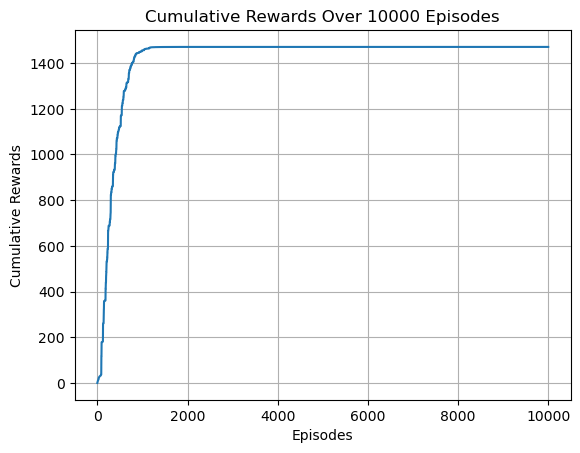

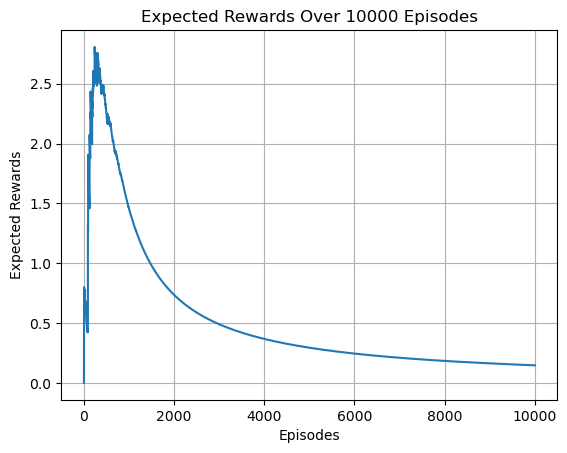

In [34]:
x = [i for i in range(0,10001)]
y = cuml_sum


# PREVENT ADDING MORE ZERO INCASE OF USER ERROR
if (y[0] != 0):
    y.insert(0,0)

# CUMULATIVE REWARD PER EPISODE
Expected_reward_array = []
for i in x:
    if i == 0:
        Expected_reward_array.append(0)
        continue
    Expected_reward_array.append(y[i]/i)

# Plot
plt.plot(x,y)
plt.grid('on')
plt.title("Cumulative Rewards Over 10000 Episodes")
plt.xlabel("Episodes")
plt.ylabel("Cumulative Rewards")
plt.show()
plt.plot(x,Expected_reward_array)
plt.grid('on')
plt.title("Expected Rewards Over 10000 Episodes")
plt.xlabel("Episodes")
plt.ylabel("Expected Rewards")
plt.show()



## FINDINGS:
### THE MAXIMUM EXPECTED VALUE CAN BE OBTAINED BETWEEN 0 - 2000 EPISODES BEFORE THE VALUE GOES DOWN AS THE CUMULATIVE VALUE AS IT REACHES 2000 EPISODES BECOMES CONSTANT

## HEATMAP OR POLICY OF THE AGENT IN SOLVING THE FROZEN LAKE PROBLEM 

Text(183.22222222222223, 0.5, 'Current State')

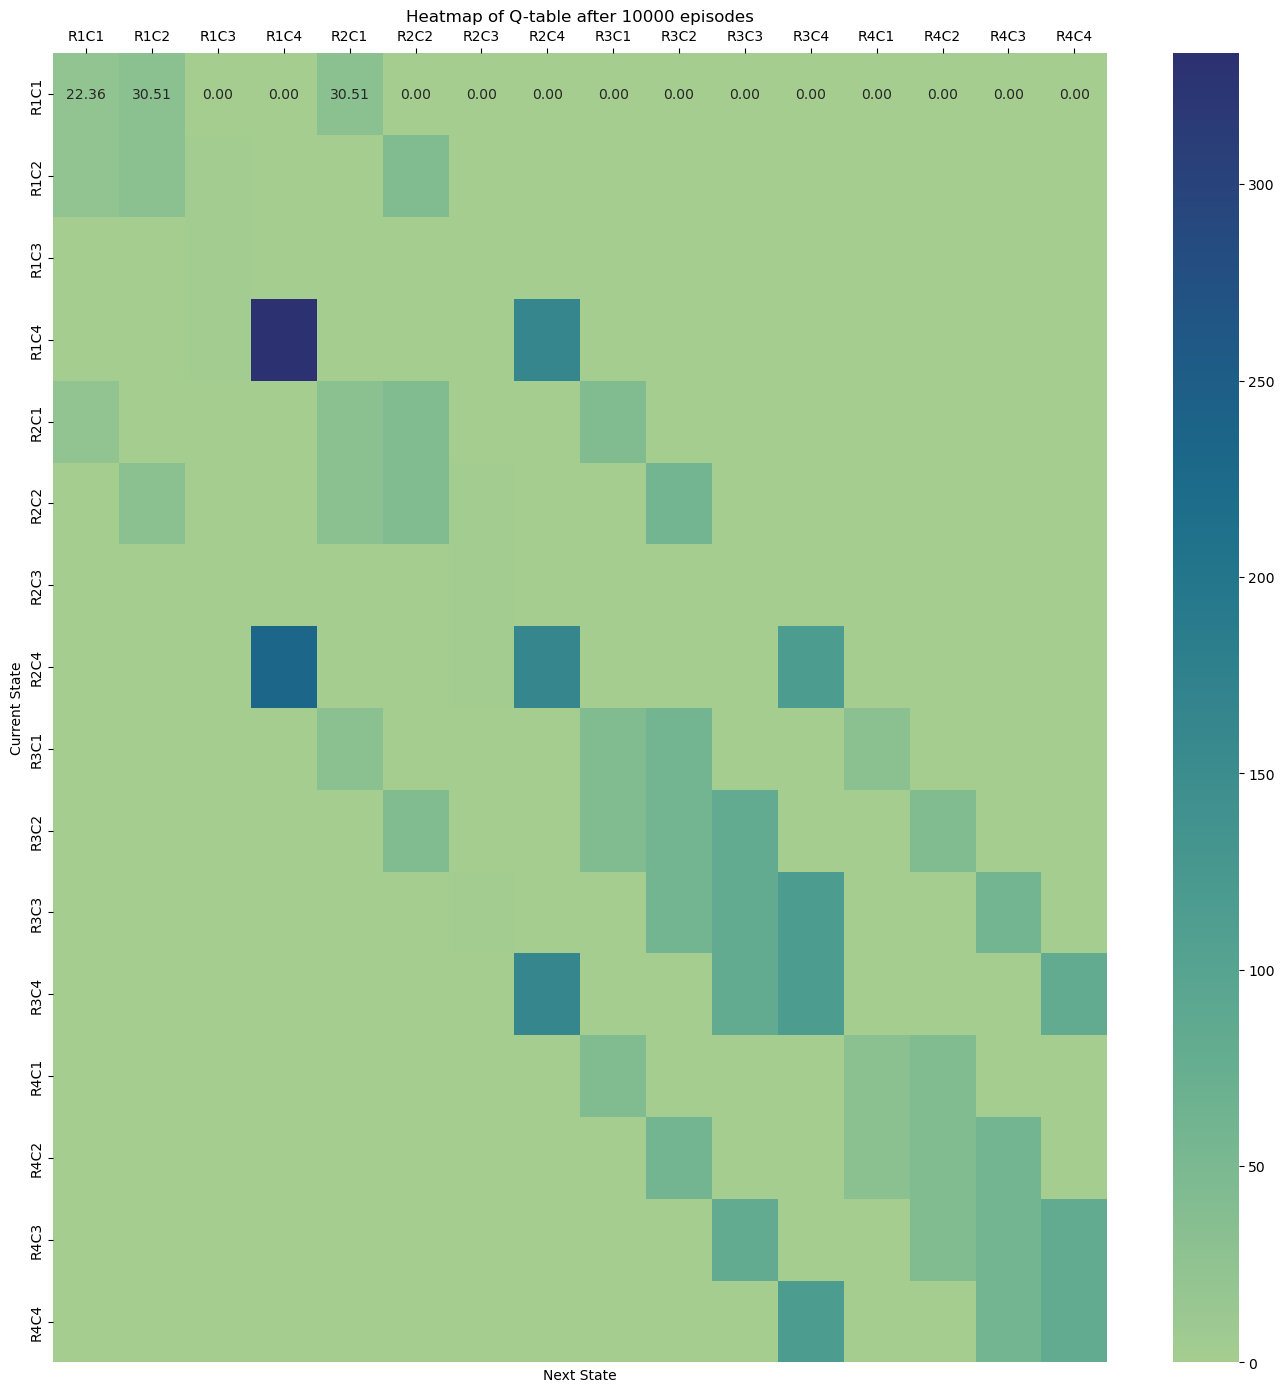

In [35]:
import seaborn as sns

# CREATE HEATMAP
ax = plt.figure(figsize=(17,17))
ax = sns.heatmap(Q,annot= True,fmt= ".2f",xticklabels=list(location_to_state.keys()),yticklabels=list(location_to_state.keys()),cmap="crest")

# LABEL HEATMAP
ax.xaxis.tick_top()
plt.title("Heatmap of Q-table after 10000 episodes")
plt.xlabel("Next State")
plt.ylabel("Current State")

## ANIMATION OF THE AGENT AND VISUALIZATION OF ITS INTERACTION WITHIN THE FROZEN LAKE ENVIRONMENT

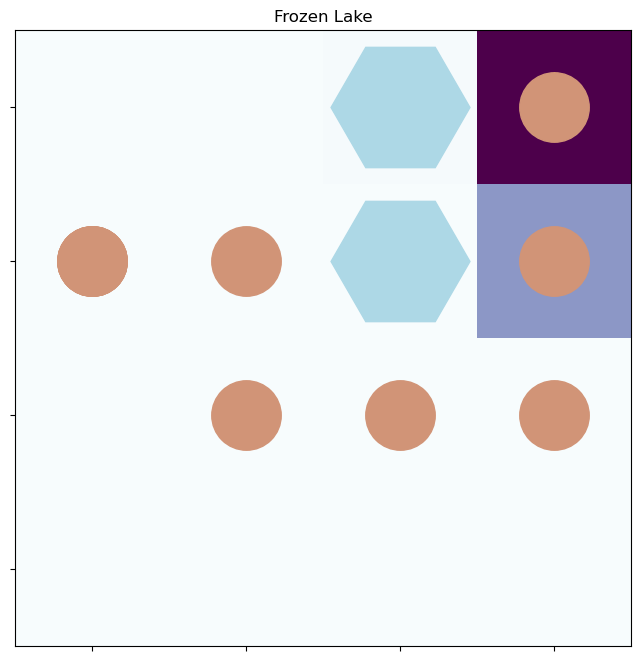

In [36]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML



location_to_graph = {
    'R1C1' : [0,0],
    'R1C2' : [1,0],
    'R1C3' : [2,0],
    'R1C4' : [3,0],
    'R2C1' : [0,1],
    'R2C2' : [1,1],
    'R2C3' : [2,1],
    'R2C4' : [3,1],
    'R3C1' : [0,2],
    'R3C2' : [1,2],
    'R3C3' : [2,2],
    'R3C4' : [3,2],
    'R4C1' : [0,3],
    'R4C2' : [1,3],
    'R4C3' : [2,3],
    'R4C4' : [3,3],
}



path = []
path_animation = [] # added this state for animation 
blocks = [location_to_graph[block_1],location_to_graph[block_2]]
for i in route:
    path_animation.append(location_to_state[i])
    path.append([location_to_graph[i],i])



# SET UP INITIAL ENVIRONMENT
fig, ax = plt.subplots(figsize = (8,8))
data = np.zeros((4,4))
heatmap = ax.imshow(data, cmap='YlOrRd', origin='upper')
heatmap = plt.title("Frozen Lake")
heatmap = plt.xticks(np.arange(0,4,1))
heatmap = plt.yticks(np.arange(0,4,1))
heatmap =ax.set_xticklabels([])
heatmap = ax.set_yticklabels([])
heatmap = plt.plot(blocks[0][0],blocks[0][1],marker = 'H', color = "lightblue",markersize= 100)
heatmap = plt.plot(blocks[1][0],blocks[1][1],marker = 'H', color = "lightblue",markersize= 100)
heatmap = plt.plot(path[-1][0][0],path[-1][0][1],marker = '*', color = "yellow",markersize= 50)
heatmap = plt.plot([],[],marker = 'o', color = "grey",markersize= 50)


# GET AGENT STEPS AND TURN IT INTO FRAMES
frames = len(path_animation)

# UPDATE PER FRAME
def update(frame):

    # TURN IT FROM LOOP BASED TO FUNCTION BASED CODE BLOCK
    j = state_to_location[path_animation[frame]]
    Q_val_heat_map_loc = []
    j_index = location_to_state[j]
    for k in range(16):
        Q_val_heat_map_loc.append(Q[j_index,k])
    Q_val_heat_map_loc = np.array(Q_val_heat_map_loc).reshape((4,4))
    
    
    # PLOT UPDATED ENVIRONMENT
    heatmap = ax.imshow(Q_val_heat_map_loc,cmap="BuPu")
    heatmap = plt.xticks(np.arange(0,4,1))
    heatmap = plt.yticks(np.arange(0,4,1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    # PLOT AGENT DECISION AND CHOSEN DESTINATION
    heatmap = plt.plot(location_to_graph[j][0],location_to_graph[j][1],marker = 'o', color = "#D19477",markersize= 50)
    if (frame < frames - 1):
        heatmap = plt.plot(path[frame+1][0][0],path[frame+1][0][1],marker = "X",color = "red", markersize = 20)
    return heatmap
    
# ANIMATING THE AGENT ACTIONS AND ENVIRONEMNT
ani = FuncAnimation(fig, update, frames= frames, blit=True)

HTML(ani.to_jshtml())









## LEGEND
### HUMAN COLOR = AGENT
### PURPLE COLOR = THE DARKER THE COLOR IS THEN THE MORE LIKELY IT IS NEAREST TO THE GOAL 
### RED X = CHOSEN AGENT LOCATION
### LIGHT BLUE HEXAGON = FROZEN CELL
### STAR = GOAL